In [2]:
#Building your First Convolution Neural Network 

from keras.layers import Input, Flatten, Dense, Conv2D,BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K 
from keras.datasets import cifar10

In [3]:
#Defining the data
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
import matplotlib.pyplot as plt
import numpy as np


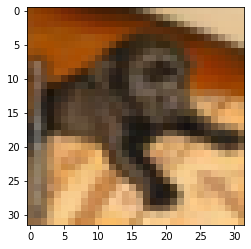

In [5]:
plt.imshow(x_train[56])

In [6]:
# Scaling the Images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
type(x_train[1])

numpy.ndarray

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
# we also need to change the integer labelling of the images to the One Hot Encoded vectors
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
x_train.shape

(50000, 32, 32, 3)

It’s worth noting the shape of the image data in x_train: [50000, 32, 32, 3]. The first dimension
of this array references the index of the image in the dataset, the second and third relate to the size of
the image, and the last is the channel (i.e., red, green, or blue, since these are RGB images). There are
no columns or rows in this dataset; instead, this is a tensor with four dimensions. For example, the
following entry refers to the green channel (1) value of the pixel in the (12,13) position of image 54:

In [12]:
x_train[100, 12, 13, 1]

0.8235294


#Building the Model

The architecture using a Sequential model

A Sequential model is useful for quickly defining a linear stack of layers (i.e., where one layer
follows on directly from the previous layer without any branching).

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([Dense(200, activation = 'relu', input_shape =(32, 32, 3)),
                    Flatten(),
                    Dense(150, activation = 'relu'),
                    Dense(10, activation = 'softmax')
                    ])

The architecture using the Functional API



In [14]:
# Functional Approach API
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape = (32, 32, 3))
x = Flatten()(input_layer)
x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units = 10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)


Here, we are using three different types of layer: Input, Flatten, and Dense.
The Input layer is an entry point into the network. We tell the network the shape of each data element
to expect as a tuple. Notice that we do not specify the batch size; this isn’t necessary as we can pass
any number of images into the Input layer simultaneously. We do not need to explicitly state the batch
size in the Input layer definition.
Next we flatten this input into a vector, using a Flatten layer. This results in a vector of length 3,072
(= 32 × 32 × 3). The reason we do this is because the subsequent Dense layer requires that its input is
flat, rather than a multidimensional array. As we shall see later, other layer types require
multidimensional arrays as input, so you need to be aware of the required input and output shape of
each layer type to understand when it is necessary to use Flatten.


The ReLU (rectified linear unit) activation function is defined to be zero if the input is negative and is
otherwise equal to the input. The LeakyReLU activation function is very similar to ReLU, with one
key difference: whereas the ReLU activation function returns zero for input values less than zero, the
LeakyReLU function returns a small negative number proportional to the input. ReLU units can
sometimes die if they always output zero, because of a large bias toward negative values
preactivation. In this case, the gradient is zero and therefore no error is propagated back through this
unit. LeakyReLU activations fix the issue by always ensuring the gradient is nonzero. ReLU-based
functions are now established to be the most reliable activations to use between the layers of a deep
network to encourage stable training



In our example, we pass the input through two dense hidden layers, the first with 200 units and the
second with 150, both with ReLU activation functions

The final step is to define the model itself, using the Model class. In Keras a model is defined by the
input and output layers. In our case, we have one input layer that we defined earlier, and the output
layer is the final Dense layer of 10 units

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


Notice how Keras uses None as a marker to show that it doesn’t yet know the number of observations
that will be passed into the network. In fact, it doesn’t need to; we could just as easily pass one
observation through the network at a time as 1,000. That’s because tensor operations are conducted
across all observations simultaneously using linear algebra—this is the part handled by TensorFlow.
It is also the reason why you get a performance increase when training deep neural networks on GPUs
instead of CPUs: GPUs are optimized for large tensor multiplications since these calculations are
also necessary for complex graphics manipulation.

In [16]:
# Compiling the Model
from keras.optimizers import Adam
opt = Adam(lr = 0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt)
# loss parameter is based on target labels ==> multi class
metrics = ['accuracy']

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


x_train --> raw image data

y_train -->one-hot-encoded class labels.

The batch_size determines how many observations will be passed to the network at each training step.

The epochs determine how many times the network will be shown the full training data.

If shuffle = True, the batches will be drawn randomly without replacement from the training data at each training step.

In [17]:
# Model train

model.fit(x_train, y_train, batch_size = 180, epochs = 10, shuffle = 10)

Epoch 1/10
278/278 [==============================] - 4s 3ms/step - loss: 1.9072
Epoch 2/10
278/278 [==============================] - 1s 4ms/step - loss: 1.7102
Epoch 3/10
278/278 [==============================] - 1s 3ms/step - loss: 1.6284
Epoch 4/10
278/278 [==============================] - 1s 4ms/step - loss: 1.5777
Epoch 5/10
278/278 [==============================] - 1s 4ms/step - loss: 1.5380
Epoch 6/10
278/278 [==============================] - 1s 3ms/step - loss: 1.5038
Epoch 7/10
278/278 [==============================] - 1s 3ms/step - loss: 1.4784
Epoch 8/10
278/278 [==============================] - 1s 3ms/step - loss: 1.4457
Epoch 9/10
278/278 [==============================] - 1s 3ms/step - loss: 1.4292
Epoch 10/10
278/278 [==============================] - 1s 4ms/step - loss: 1.4035


In [18]:
history

a = ['codegnan','python','vjwda','mern','jap']
c = enumerate(a,2)
#print(list(c))
print(dict(c))
#Building your First Convolution Neural Network 

from keras.layers import Input, Flatten, Dense, Conv2D,BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K 
from keras.datasets import cifar10
#Defining the data
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_train[56])
# Scaling the Images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
type(x_train[1])
y_train
# we also need to change the integer labelling of the images to the One Hot Encoded vectors
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
y_train[0]
x_train.shape
x_train[100, 12, 13, 1]
from keras.models import

The output from this method is a list of the metrics we are monitoring: categorical cross-entropy and
accuracy. We can see that model accuracy is still 49.0% even on images that it has never seen before.
Note that if the model was guessing randomly, it would achieve approximately 10% accuracy
(because there are 10 classes), so 50% is a good result given that we have used a very basic neural
network.

One of the reasons our network isn’t yet performing as well as it might is because there isn’t anything
in the network that takes into account the spatial structure of the input images. In fact, our first step is
to flatten the image into a single vector, so that we can pass it to the first Dense layer!
To achieve this we need to use a convolutional layer.

If we see in the above case loss started from 1.8-->1.3

As it is a Basic Neural Network getting 50% is okay now we will include Convolution layer for it


One of the reasons our network isn’t yet performing as well as it might is because there isn’t anything
in the network that takes into account the spatial structure of the input images. In fact, our first step is
to flatten the image into a single vector, so that we can pass it to the first Dense layer!

To achieve this we need to use a convolutional layer.



**#Architecture**

The convolution is performed by multiplying the filter pixelwise with the portion of the image, and summming the result. The output is more positive when the portion of the image closely matches the filter and more negative when the portion of the image is the inverse of the filter.

The strides parameter is the step size used by the layer to move the filters across the input. Increasing the stride therefore reduces the size of the output tensor. For example, when strides = 2, the height and width of the output tensor will be half the size of the input tensor. This is useful for reducing the spatial size of the tensor as it passes through the network, while increasing the number of channels.

The padding = "same" input parameter pads the input data with zeros so that the output size from the layer is exactly the same as the input size when strides = 1.

The output of a Conv2D layer is another four-dimensional tensor, now of shape (batch_size, height, width, filters), so we can stack Conv2D layers on top of each other to grow the depth of our neural network. It’s really important to understand how the shape of the tensor changes as data flows through from one convolutional layer to the next. To demonstrate this, let’s imagine we are applying Conv2D layers to the CIFAR-10 dataset. This time, instead of one input channel (grayscale) we have three (red, green, and blue)




In [19]:
input_layer = Input(shape = (32,32, 3))

conv_layer_1 = Conv2D(filters = 10,
                      kernel_size = (4,4),
                      strides = 2,
                      padding = 'same')(input_layer)

conv_layer_2 = Conv2D(filters = 20,
                      kernel_size = (3,3),
                      strides = 2,
                      padding = 'same')(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units = 10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

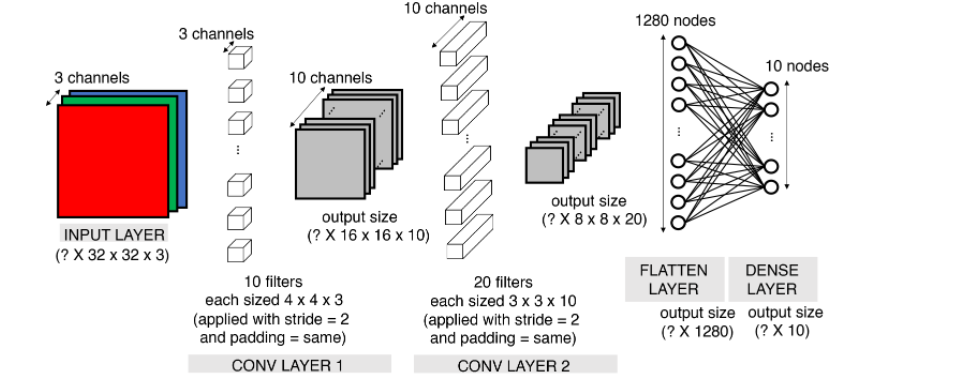

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


The input shape is (None, 32, 32, 3)—Keras uses None to represent the fact that we can pass any number of images through the network simultaneously. Since the network is just performing tensor algebra, we don’t need to pass images through the network individually, but instead can pass them through together as a batch.

The shape of the filters in the first convolutional layer is 4 × 4 × 3. This is because we have chosen the filter to have height and width of 4 (kernel_size = (4,4)) and there are three channels in the preceding layer (red, green, and blue). Therefore, the number of parameters (or weights) in the layer is (4 × 4 × 3 + 1) × 10 = 490, where the + 1 is due to the inclusion of a bias term attached to each of the filters. It’s worth remembering that the depth of the filters in a layer is always the same as the number of channels in the preceding layer.

 the output from each filter when applied to each 4 × 4 × 3 section of the input image will be the pixelwise multiplication of the filter weights and the area of the image it is covering. As strides = 2 and padding = "same", the width and height of the output are both halved to 16, and since there are 10 filters the output of the first layer is a batch of tensors each having shape [16, 16, 10].

In general, the shape of the output from a convolutional layer with padding="same" is:

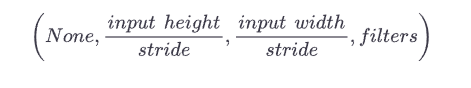




**Batch Normalization**:It is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks


**Dropout Layers:** 

When studying for an exam, it is common practice for students to use past papers and sample questions to improve their knowledge of the subject material. Some students try to memorize the answers to these questions, but then come unstuck in the exam because they haven’t truly understood the subject matter. The best students use the practice material to further their general understanding, so that they are still able to answer correctly when faced with new questions that they haven’t seen before.

The same principle holds for machine learning. Any successful machine learning algorithm must ensure that it generalizes to unseen data, rather than simply remembering the training dataset. If an algorithm performs well on the training dataset, but not the test dataset, we say that it is suffering from overfitting. To counteract this problem, we use regularization techniques, which ensure that the model is penalized if it starts to overfit.

There are many ways to regularize a machine learning algorithm, but for deep learning, one of the most common is by using dropout layers. 

Dropout layers are very simple. During training, each dropout layer chooses a random set of units from the preceding layer and sets their output to zero

Dropout layers are used most commonly after Dense layers since these are most prone to overfitting due to the higher number of weights, though you can also use them after convolutional layers.



In [21]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)
x=Dense(128)(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Dropout(rate=0.5)(x)
 
x=Dense(NUM_CLASSES)(x)
output_layer=Activation('softmax')(x)
model=Model(input_layer,output_layer)


In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

We use four stacked Conv2D layers, each followed by a BatchNormalization and a LeakyReLU layer. After flattening the resulting tensor, we pass the data through a Dense layer of size 128, again followed by a BatchNormalization and a LeakyReLU layer. This is immediately followed by a Dropout layer for regularization, and the network is concluded with an output Dense layer of size 10

Problem we see in ReLU is the Dying ReLU problem where some ReLU Neurons essentially die for all inputs and remain inactive no matter what input is supplied, here no gradient flows and if large number of dead neurons are there in a Neural Network it’s performance is affected, this can be corrected by making use of what is called Leaky ReLU where slope is changed left of x=0 in above figure and thus causing a leak and extending the range of ReLU

With Leaky ReLU there is a small negative slope, so instead of not firing at all for large gradients, our neurons do output some value and that makes our layer much more optimized too.



In [23]:
# training
opt = Adam(lr = 0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [24]:
# Fitting the data to the model
model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True, validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 16s 6ms/step - loss: 1.5603 - accuracy: 0.4549 - val_loss: 1.2759 - val_accuracy: 0.5367
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1606 - accuracy: 0.5893 - val_loss: 1.0490 - val_accuracy: 0.6297
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0139 - accuracy: 0.6436 - val_loss: 0.9687 - val_accuracy: 0.6626
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9310 - accuracy: 0.6752 - val_loss: 0.9485 - val_accuracy: 0.6732
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8703 - accuracy: 0.6946 - val_loss: 0.9146 - val_accuracy: 0.6808
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8081 - accuracy: 0.7202 - val_loss: 0.8481 - val_accuracy: 0.7016
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7692 - accuracy: 0.7327 - val_loss: 0.8094 - val_acc

In [25]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 24ms/step - loss: 0.8395 - accuracy: 0.7138


[0.8394975662231445, 0.7138000130653381]

In [26]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 
                    'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step


In [27]:
a = ['codegnan','python','vjwda','mern','jap']
c = enumerate(a,2)
#print(list(c))
print(dict(c))

{2: 'codegnan', 3: 'python', 4: 'vjwda', 5: 'mern', 6: 'jap'}


In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

<Figure size 1080x216 with 0 Axes>

In [ ]:
#then we will add our required data values to it

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), 
            fontsize=10, ha='center', transform=ax.transAxes) 
    ax.imshow(img)

<ipython-input-49-14a80dd1805b>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, n_to_show, i+1)


[5813 3691 4534 2382 9074 8820 5574 6239 3451 9326]


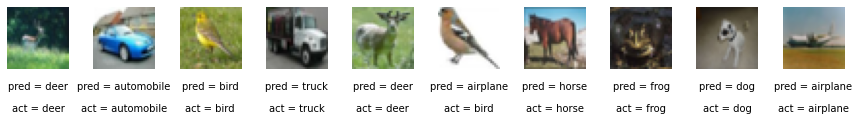

In [28]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
print(indices)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#then we will add our required data values to it
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), 
            fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), 
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

**https://data.world/crowdflower/brands-and-product-emotions**


---



In [ ]:
# https://rapidapi.com/rapidapi/api/movie-database-alternative/

This improvement has been achieved simply by changing the architecture of the model to include convolutional, batch normalization, and dropout layers. Notice that the number of parameters is actually fewer in our new model than the previous model, even though the number of layers is far greater. This demonstrates the importance of being experimental with your model design and being comfortable with how the different layer types can be used to your advantage. When building generative models, it becomes even more important to understand the inner workings of your model since it is the middle layers of your network that capture the high-level features that you are most interested in.


**Recurrent neural networks**

A neural network that is intentionally run multiple times, where parts of each run feed into the next run. Specifically, hidden layers from the previous run provide part of the input to the same hidden layer in the next run. Recurrent neural networks are particularly useful for evaluating sequences, so that the hidden layers can learn from previous runs of the neural network on earlier parts of the sequence.

For example, the following figure shows a recurrent neural network that runs four times. Notice that the values learned in the hidden layers from the first run become part of the input to the same hidden layers in the second run. Similarly, the values learned in the hidden layer on the second run become part of the input to the same hidden layer in the third run. In this way, the recurrent neural network gradually trains and predicts the meaning of the entire sequence rather than just the meaning of individual words.


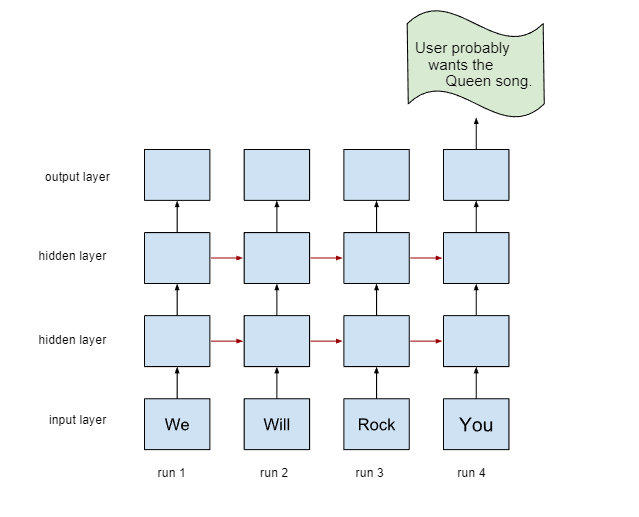

Deep learning model to analyze Twitter sentiment about Apple and Google products. The dataset I used comes from CrowdFlower via data.world. In this dataset, human raters were asked to rate the sentiment of over 9,000 Tweets as positive, negative, or neither. I am seeking to use this labled dataset to build a NLP model that can predict the sentiment of the Tweet based on its text content

https://data.world/crowdflower/brands-and-product-emotions

**Preprocessing**

We start (as we do in most example projects) by downloading the csv and placing it into the local project folder. We then read the data into a Pandas DataFrame with the code below.

In [29]:
import pandas as pd

data = pd.read_csv('https://mjnvsai.github.io/Neural_Networks_Workshop/tweet_product_company.csv',
                   encoding = "ISO-8859-1")
data.head() #top 5 rows from the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [30]:
#how many missing values in the dataframe
data.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [31]:
df = data.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product":
                        "emotion"})
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at', 'emotion'], dtype='object')

In [32]:
df = df.dropna(subset=['emotion', 'tweet_text'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       9092 non-null   object
 1   emotion_in_tweet_is_directed_at  3291 non-null   object
 2   emotion                          9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [34]:
#As we have removed null values from input tweet text
df['tweet_text']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9092, dtype: object

In [35]:
#even if we want access row-wise data-->loc() vs iloc()
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    7,    8,    9,   10,
            ...
            9083, 9084, 9085, 9086, 9087, 9088, 9089, 9090, 9091, 9092],
           dtype='int64', length=9092)

In [36]:
#as in our case index is integer format both 
#loc() and iloc() returns same values
df.loc[1]['emotion']

'Positive emotion'

In [37]:
df.iloc[0]['tweet_text']

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [38]:
import nltk
from nltk.tokenize import word_tokenize

In [39]:
#nltk.download('all')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
#Tokenization
data = df['tweet_text'].map(word_tokenize).values
#data

Comprehension --> One line expressions 

#Every List Comprehension can be rewritten as a For loop
but every for loop cannot be rewritten

a = [exprsn for var in function/collection]



In [41]:
d = []
for i in range(1,11,2):
  #print(i)
  d.append(i)
print(d)

[1, 3, 5, 7, 9]


In [42]:
e = [i for i in  range(1,11,2)]
print(e)

[1, 3, 5, 7, 9]


In [43]:
#Tokenization
data = df['tweet_text'].map(word_tokenize).values
#data
total_vocabulary = set(word.lower() for tweet in data for 
                       word in tweet)
#total_vocabulary

In [44]:
print('There are {} unique words in the dataset.'.
      format(len(total_vocabulary)))
print('There are {} unique tweets in the dataset.'.
      format(len(data)))


There are 10694 unique words in the dataset.
There are 9092 unique tweets in the dataset.


In [46]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


We creates a Keras Tokenizer object. I limited the number of words for the tokenizer to the most frequent 20,000 (even though we already determined we only have a little over 10k).

Then uses the ‘fit_on_texts’ method to update the internal vocabulary of the tokenizer based on a list of text we send to it. What is happening here is that we send in the text of each tweet, and the tokenizer builds a dictionary of the word frequency of the 10,000+ words.

uses the ‘text_to_sequences’ method to convert the words in each tweet into a sequence of integers. The entire dataset is then stored in a NumPy matrix for easy processing.

is where we will pad the tokenized text so they are all the same length to feed into the input for our neural network. I chose a max number of 100 words for each tweet. If the tweet is longer, it gets truncated. If it is smaller, padding is added in the form of zeroes.
At this point in our project, we have our ‘y’ which is the target/output of our NN, and ‘X’ which contains the numerical input arrays for each tweet. Now we are ready to make our neural network.

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional,GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers,layers
from keras.preprocessing import text, sequence

In [48]:
# set the emotion/sentiment as our target
target = df['emotion']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values
#y

In [49]:
# use keras to create a Tokenizer object for our input
tokenizer = text.Tokenizer(num_words=20000)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(df['tweet_text']))

In [50]:
tokenizer

In [51]:
tokenized_texts = tokenizer.texts_to_sequences(df['tweet_text'])
#tokenized_texts #length of individual words in the sequences


In [52]:
X = pad_sequences(tokenized_texts, maxlen=100)
#X

We are creating a Sequential model, and using the ‘add’ method to build the NN:

Embedding Layer: This layer requires that the input data be integer encoded, so each word being fed into the embedding layer is represented by a unique integer. We did this task earlier with the tokenizer.

The embedding layer is initialized with random weights and will be learning for all words in the training dataset.

The embedding layer has arguments including:

input_dim: This is the size of the vocabulary in the text data which we have calculated already (around 10k)
output_dim: This is the size of the vector space in which words will be embedded. This value can be tuned.


An RNN has a memory and the ability to remember and/or forget.

RNNs can temporarily store word weights based on their importance and relative location to other words in the text. They are well-suited to classifying, processing, and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. This also makes them great for NLP as it lets your model pick up on nuances of structured language like proximity and context using relative positions within the text, and also by remembering important words for later in the text.

We follow our layer with a 1D pooling layer to simplify the output.

Dense and Dropout Layers: We add some standard dense layers to our network. We also add dropout layers with the intention of improving generalization. The number of layers and nodes you use are adjustable if you want to tune your model further.

Note that our final output layer must have the same shape as our target. For this project, we use a Dense layer of size 4 to match the number of categories of my output (emotion).

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

# create NN model
model = Sequential()

embedding_size = 128

model.add(Embedding(len(total_vocabulary), embedding_size))

model.add(LSTM(25, return_sequences=True))

model.add(GlobalMaxPool1D())

model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

Now it’s time to compile the model. Here we provide important parameters such as which loss function to use (‘categorical_crossentropy’, since this is a multiclass classification problem), and the optimizer to use.

After compiling the model, we can quickly check the summary to see what the model looks like, and make sure the output shapes line up with what you expect.


In [54]:
#Training our Model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary() # check the shape

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1368832   
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_9 (Dense)             (None, 50)                1300      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                      

Now we can fit the compiled model. This step can take some time depending on the parameters you have chosen.

More epochs improves the overall result, but can also greatly affect the training time. The model generate scoring outputs as it fits the model. You can look at the validation score it prints out to see if the model is still improving with each epoch to know where an acceptable cutoff might be.

The batch size limits the number of samples to be shown to the network before a weight update can be performed. 32 is a common size for smaller datasets.

In [55]:
model.fit(X_train, y_train, epochs=10, batch_size=32, 
          validation_split=0.1) 

Epoch 1/10
205/205 [==============================] - 6s 11ms/step - loss: 1.0072 - accuracy: 0.5678 - val_loss: 0.9288 - val_accuracy: 0.5865
Epoch 2/10
205/205 [==============================] - 2s 8ms/step - loss: 0.9080 - accuracy: 0.5948 - val_loss: 0.8706 - val_accuracy: 0.5865
Epoch 3/10
205/205 [==============================] - 2s 8ms/step - loss: 0.8253 - accuracy: 0.6260 - val_loss: 0.8715 - val_accuracy: 0.6332
Epoch 4/10
205/205 [==============================] - 2s 8ms/step - loss: 0.7255 - accuracy: 0.7091 - val_loss: 0.9048 - val_accuracy: 0.6538
Epoch 5/10
205/205 [==============================] - 2s 8ms/step - loss: 0.6369 - accuracy: 0.7687 - val_loss: 0.9684 - val_accuracy: 0.6030
Epoch 6/10
205/205 [==============================] - 2s 8ms/step - loss: 0.5670 - accuracy: 0.7922 - val_loss: 1.1606 - val_accuracy: 0.6593
Epoch 7/10
205/205 [==============================] - 2s 8ms/step - loss: 0.5061 - accuracy: 0.8108 - val_loss: 1.2658 - val_accuracy: 0.6332
Epoch

#                           End Of Neural Networks Workshop 